In [11]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [12]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 4*xs - 6*zs + 10 + noise

np.savez('basic_TF', inputs=generated_inputs, targets=generated_targets)
# I created a single .npz file to save the inputs and targets as numpy arrays.

In [13]:
training_data = np.load('basic_TF.npz')

In [14]:
input_size = 2
output_size = 1
# In this example, the output of my Regression model is 1.

# The 'Sequential' function specifies how my model will be created.
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                            # The 'Dense' function takes the provided inputs to the model and calculates the Dot Product of inputs and weights and adds the bias, for the operation xw +b.
                            ])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
# Here I chose the Stochastic Gradient Descent (SGD) as my optimizer because it is faster than the Gradient Descent.
# I expected the SGD to update the Weights many times in a single Epoch.
# However, SGD approximates so I lost some accuracy using it, but this trade off was worth it.

model.compile(optimizer=custom_optimizer, loss='mean_squared_error')
# This function enabled me to select the optimizer and loss function of my model.
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=1)

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 0s 221us/sample - loss: 26.8118
Epoch 2/100
1000/1000 [==============================] - 0s 23us/sample - loss: 1.7829
Epoch 3/100
1000/1000 [==============================] - 0s 21us/sample - loss: 0.4231
Epoch 4/100
1000/1000 [==============================] - 0s 21us/sample - loss: 0.3738
Epoch 5/100
1000/1000 [==============================] - 0s 22us/sample - loss: 0.3935
Epoch 6/100
1000/1000 [==============================] - 0s 21us/sample - loss: 0.3727
Epoch 7/100
1000/1000 [==============================] - 0s 21us/sample - loss: 0.3708
Epoch 8/100
1000/1000 [==============================] - 0s 20us/sample - loss: 0.3755
Epoch 9/100
1000/1000 [==============================] - 0s 23us/sample - loss: 0.3521
Epoch 10/100
1000/1000 [==============================] - 0s 21us/sample - loss: 0.3593
Epoch 11/100
1000/1000 [==============================] - 0s 20us/sample - loss: 0.3549
Epoch 12/100
1000

1000/1000 [==============================] - 0s 21us/sample - loss: 0.3671
Epoch 86/100
1000/1000 [==============================] - 0s 22us/sample - loss: 0.4069
Epoch 87/100
1000/1000 [==============================] - 0s 20us/sample - loss: 0.3774
Epoch 88/100
1000/1000 [==============================] - 0s 21us/sample - loss: 0.3747
Epoch 89/100
1000/1000 [==============================] - 0s 20us/sample - loss: 0.4015
Epoch 90/100
1000/1000 [==============================] - 0s 20us/sample - loss: 0.3966
Epoch 91/100
1000/1000 [==============================] - 0s 20us/sample - loss: 0.3801
Epoch 92/100
1000/1000 [==============================] - 0s 19us/sample - loss: 0.3801
Epoch 93/100
1000/1000 [==============================] - 0s 20us/sample - loss: 0.3669
Epoch 94/100
1000/1000 [==============================] - 0s 22us/sample - loss: 0.3571
Epoch 95/100
1000/1000 [==============================] - 0s 20us/sample - loss: 0.3571
Epoch 96/100
1000/1000 [=====================

In [5]:
model.layers[0].get_weights()

[array([[ 2.0056448],
        [-2.9193065]], dtype=float32),
 array([4.990919], dtype=float32)]

In [6]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0056448],
       [-2.9193065]], dtype=float32)

In [7]:
bias = model.layers[0].get_weights()[1]
bias
# I decided to save the weights and bias in separate variables for easier examination.

array([4.990919], dtype=float32)

In [15]:
model.predict_on_batch(training_data['inputs'])

ERROR! Session/line number was not unique in database. History logging moved to new session 260


<tf.Tensor: id=13653, shape=(1000, 1), dtype=float32, numpy=
array([[ 2.18157997e+01],
       [-1.46852961e+01],
       [-2.82054901e-01],
       [ 1.03159428e+01],
       [-1.67085686e+01],
       [ 4.14902954e+01],
       [ 3.41401596e+01],
       [ 1.54142256e+01],
       [ 1.66890411e+01],
       [-7.88657951e+00],
       [ 1.58214655e+01],
       [-8.23624706e+00],
       [ 9.82944489e-01],
       [ 2.11604195e+01],
       [-3.50777779e+01],
       [ 2.06063118e+01],
       [ 3.52229385e+01],
       [-2.29945612e+00],
       [ 3.07199364e+01],
       [ 3.55885124e+01],
       [ 3.06069183e+01],
       [-2.54600487e+01],
       [ 4.07272625e+00],
       [-1.87485390e+01],
       [ 4.50852432e+01],
       [ 2.04504375e+01],
       [-1.04582329e+01],
       [-2.73355913e+00],
       [-9.53121185e+00],
       [ 2.52077255e+01],
       [ 9.31809807e+00],
       [-2.73823242e+01],
       [ 5.09532690e+00],
       [-2.94081001e+01],
       [ 9.45457172e+00],
       [ 2.66591110e+01],
   

In [9]:
training_data['targets']

array([[-1.72522721e+00],
       [ 1.13400567e+01],
       [-3.38255233e+01],
       [ 1.26728942e+01],
       [-6.98220013e+00],
       [-1.89733582e+01],
       [ 3.50960425e+01],
       [ 4.20697977e+00],
       [ 3.87617196e+01],
       [ 3.48709602e+00],
       [ 3.18544756e+01],
       [ 1.95316089e+00],
       [-1.00108139e+01],
       [ 6.50965380e+00],
       [-2.52605165e+01],
       [ 8.59328883e+00],
       [ 4.59941973e+01],
       [ 1.15537556e+01],
       [-1.46827087e+01],
       [ 1.30649052e+01],
       [-1.80245630e+01],
       [-7.70101166e-01],
       [-1.03644989e+01],
       [ 4.39307109e+01],
       [-2.71223893e+01],
       [-4.39401363e+00],
       [-1.09576544e+01],
       [ 7.54977905e+00],
       [ 3.13117204e+01],
       [ 1.51359463e+01],
       [ 1.56187459e+01],
       [ 1.71559480e+01],
       [-1.06450396e+01],
       [ 4.08115050e+01],
       [-4.53031080e+00],
       [ 6.88071699e-01],
       [-7.01654423e+00],
       [ 2.27261747e+01],
       [ 2.6

## Plotting the data

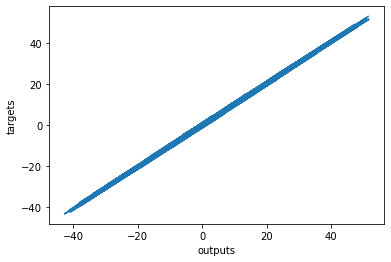

In [10]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
# I squeezed the arrays to fit them into the standard of the plot function.
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()